<a href="https://colab.research.google.com/github/Vasanth2703/Deep-Learning-and-ML-Basics/blob/main/FashionMNISTDataset_NotCompleted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow_datasets as tfds
import logging

tf.get_logger().setLevel(logging.ERROR)


import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm=tqdm.auto.tqdm

print(tf.__version__)



2.12.0


In [ ]:
dataset, metadata=tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteF0UDTH/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteF0UDTH/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
train_dataset, test_dataset=dataset['train'], dataset['test']

In [ ]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
num_train_examples=metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Numbre of test examples: {}".format(num_test_examples))


Number of training examples: 60000
Numbre of test examples: 10000


In [ ]:
def normalize(images, labels):
  images=tf.cast(images, tf.float32)
  images/=255
  return images, labels

train_datasets=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)

train_dataset=train_dataset.cache()
test_dataset=test_dataset.cache()

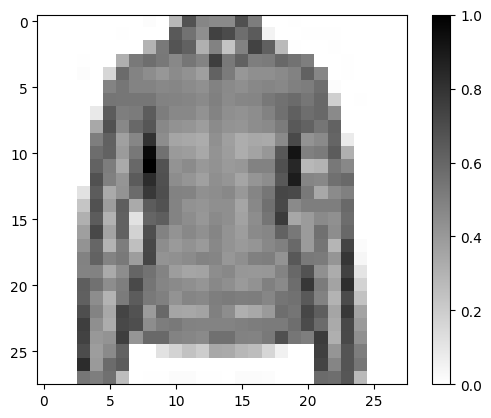

In [ ]:
for image, label in test_dataset.take(1):
  break
image=image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))

for (image, label) in test_dataset.take(25):
  image=image.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()

ValueError: ignored

<Figure size 1000x1000 with 0 Axes>

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE=32
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4897 - accuracy: 0.8349
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4732 - accuracy: 0.8391
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4630 - accuracy: 0.8422
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4705 - accuracy: 0.8427
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4643 - accuracy: 0.8449


In [ ]:
test_loss, test_accuracy=model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print("Accuracy on test dataset:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 2.8280 - accuracy: 0.1062
Accuracy on test dataset: 0.10620000213384628


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images=test_images.numpy()
  test_labels=test_labels.numpy()
  predictions=model.predict(test_images)

1/1 [==============================] - 0s 414ms/step


In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([0.1357953 , 0.00912386, 0.1195815 , 0.05682718, 0.02864238,
       0.03111068, 0.53349984, 0.01578301, 0.06440452, 0.00523179],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

6

In [ ]:
test_labels[0]

4